#**Desafío: Telecom X**

**Diccionario de datos**

* customerID: número de identificación único de cada cliente
* Churn: si el cliente dejó o no la empresa
* gender: género (masculino y femenino)
* SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
* Partner: si el cliente tiene o no una pareja
* Dependents: si el cliente tiene o no dependientes
* tenure: meses de contrato del cliente
* PhoneService: suscripción al servicio telefónico
* MultipleLines: suscripción a más de una línea telefónica
* InternetService: suscripción a un proveedor de internet
* OnlineSecurity: suscripción adicional de seguridad en línea
* OnlineBackup: suscripción adicional de respaldo en línea
* DeviceProtection: suscripción adicional de protección del dispositivo
* TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
* StreamingTV: suscripción de televisión por cable
* StreamingMovies: suscripción de streaming de películas
* Contract: tipo de contrato
* PaperlessBilling: si el cliente prefiere recibir la factura en línea
* PaymentMethod: forma de pago
* Charges.Monthly: total de todos los servicios del cliente por mes
* Charges.Total: total gastado por el cliente

Link de la información: https://github.com/ingridcristh/challenge2-data-science-LATAM/blob/main/TelecomX_Data.json

https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json

#📌 Extracción

In [1]:
# importar librerias necesarias
import requests
import json
import pandas as pd
import numpy as np
#librerias gráficas
import seaborn as sns
import matplotlib.pyplot as plt
import yellowbrick
import plotly.express as px

In [2]:
# se usa el metodo request y se guarda en la variable datos_telecomx
# se copia la dirección electrónica y se adiciona https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json'
datos_telecomx = requests.get(url)

In [3]:
# Check if the request was successful
datos_telecomx.raise_for_status()

In [4]:
# Load the JSON data
# se crea variable para cargar u guardar los datos se especifica el atributo de la informacion
lista_telecomx = json.loads(datos_telecomx.text)

In [5]:
# Display the loaded data
type(lista_telecomx)

list

In [6]:
#crear dataframe

df_telecomx = pd.DataFrame(lista_telecomx)
#ver dataframe
df_telecomx.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [7]:
type(df_telecomx)

pandas.core.frame.DataFrame

In [8]:
df_telecomx['customer']

,customer
0,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part..."
1,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne..."
2,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne..."
3,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne..."
4,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part..."
...,...
7262,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part..."
7263,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne..."
7264,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne..."
7265,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne..."


In [9]:
# Normalizar el dataframe

df_telecomx_normalizados = pd.json_normalize(lista_telecomx)

#ver la dataframe normalizada

df_telecomx_normalizados

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [10]:
df_telecomx_normalizados.shape

(7267, 21)

In [11]:
type(df_telecomx_normalizados)

pandas.core.frame.DataFrame

In [12]:
# Renombrar las columnas
df_telecomx_normalizados.rename(columns={'customerID':'ID_cliente',
                                           'Churn':'Churn (Si/No)',
                                           'customer.gender':'Genero',
                                           'customer.SeniorCitizen':'Persona_mayor_65_años(Si/No)',
                                           'customer.Partner':'Pareja(Si/No)',
                                           'customer.Dependents':'Dependientes(Si/No)',
                                           'customer.tenure':'Antiguedad del cliente (meses)',
                                           'phone.PhoneService':'Suscr_Servicio_telefónico(Si/No)',
                                           'phone.MultipleLines':'Suscr_multiples_líneas_telefónicas(3)',
                                           'internet.InternetService':'Suscr_Servicio_internet(3)',
                                           'internet.OnlineSecurity':'Suscr_Adi_seguridad_en_línea(3)',
                                           'internet.OnlineBackup':'Suscr_Adi_Respaldo_en_línea(3)',
                                           'internet.DeviceProtection':'Suscr_Adi_Protección_del_dispositivo(3)',
                                           'internet.TechSupport':'Suscr_Adi_Soporte_técnico(3)',
                                           'internet.StreamingTV':'Suscr_Televisión_por_cable(3)',
                                           'internet.StreamingMovies':'Suscr_Streaming_de_películas(3)',
                                           'account.Contract':'Contrato',
                                           'account.PaperlessBilling':'Factura_en_linea(Si/No)',
                                           'account.PaymentMethod':'Metodo_de_pago',
                                           'account.Charges.Monthly':'Mensual',
                                           'account.Charges.Total':'Total'
                                           }
                                           ,inplace=True)

In [13]:
#verificar los valores unicos en cada columna
for col in df_telecomx_normalizados.columns:
  print(f"Valores Unicos en la columna llamada'{col}':{df_telecomx_normalizados[col].nunique()}")
  if df_telecomx_normalizados[col].nunique() < 50:
    print(df_telecomx_normalizados[col].unique())
    print('-' * 50 )

Valores Unicos en la columna llamada'ID_cliente':7267
Valores Unicos en la columna llamada'Churn (Si/No)':3
['No' 'Yes' '']
--------------------------------------------------
Valores Unicos en la columna llamada'Genero':2
['Female' 'Male']
--------------------------------------------------
Valores Unicos en la columna llamada'Persona_mayor_65_años(Si/No)':2
[0 1]
--------------------------------------------------
Valores Unicos en la columna llamada'Pareja(Si/No)':2
['Yes' 'No']
--------------------------------------------------
Valores Unicos en la columna llamada'Dependientes(Si/No)':2
['Yes' 'No']
--------------------------------------------------
Valores Unicos en la columna llamada'Antiguedad del cliente (meses)':73
Valores Unicos en la columna llamada'Suscr_Servicio_telefónico(Si/No)':2
['Yes' 'No']
--------------------------------------------------
Valores Unicos en la columna llamada'Suscr_multiples_líneas_telefónicas(3)':3
['No' 'Yes' 'No phone service']
----------------------

In [14]:
df_telecomx_normalizados['Churn (Si/No)'].unique()

array(['No', 'Yes', ''], dtype=object)

In [15]:
# Verificar si hay datos nulos tipo nan

df_telecomx_normalizados.isnull().sum()
#muestra lista con el total de datos nulos
#no hay datos nulos

,0
ID_cliente,0
Churn (Si/No),0
Genero,0
Persona_mayor_65_años(Si/No),0
Pareja(Si/No),0
Dependientes(Si/No),0
Antiguedad del cliente (meses),0
Suscr_Servicio_telefónico(Si/No),0
Suscr_multiples_líneas_telefónicas(3),0
Suscr_Servicio_internet(3),0


In [16]:
# revisar si hay columnas con valores vacios
df_telecomx_normalizados['Total'].isnull().sum()

np.int64(0)

In [17]:
# revisar si hay columnas con valores vacios
df_telecomx_normalizados['Churn (Si/No)'].isnull().sum()

np.int64(0)

In [18]:
df_telecomx_normalizados['Churn (Si/No)'].sample(20)

,Churn (Si/No)
357,No
6264,Yes
1194,No
6485,No
4748,No
927,No
1310,No
1670,Yes
6236,Yes
5316,Yes


In [19]:
#Verificar valores blancos o vacios en el DF
#vacios tipo object hay strings vacios
valores_blancos_o_vacios = df_telecomx_normalizados.apply(lambda x: x.astype(str).str.strip()== '').sum()
print('\nValores en blanco o vacios en cada columna:')
print(valores_blancos_o_vacios[valores_blancos_o_vacios>0])


Valores en blanco o vacios en cada columna:
Churn (Si/No)    224
Total             11
dtype: int64


In [20]:
valores_blancos_o_vacios

,0
ID_cliente,0
Churn (Si/No),224
Genero,0
Persona_mayor_65_años(Si/No),0
Pareja(Si/No),0
Dependientes(Si/No),0
Antiguedad del cliente (meses),0
Suscr_Servicio_telefónico(Si/No),0
Suscr_multiples_líneas_telefónicas(3),0
Suscr_Servicio_internet(3),0


In [21]:
#eliminar filas con datos strings vacios en la columna churn
df_telecomx_normalizados=df_telecomx_normalizados[df_telecomx_normalizados['Churn (Si/No)'].str.strip() != '']
df_telecomx_normalizados

,ID_cliente,Churn (Si/No),Genero,Persona_mayor_65_años(Si/No),Pareja(Si/No),Dependientes(Si/No),Antiguedad del cliente (meses),Suscr_Servicio_telefónico(Si/No),Suscr_multiples_líneas_telefónicas(3),Suscr_Servicio_internet(3),...,Suscr_Adi_Respaldo_en_línea(3),Suscr_Adi_Protección_del_dispositivo(3),Suscr_Adi_Soporte_técnico(3),Suscr_Televisión_por_cable(3),Suscr_Streaming_de_películas(3),Contrato,Factura_en_linea(Si/No),Metodo_de_pago,Mensual,Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [22]:
#tamaño del df despues de eliminar las filas
df_telecomx_normalizados.shape

(7043, 21)

In [23]:
#ver las filas de la columna TOTAL con valor igual a cero

df_telecomx_normalizados[df_telecomx_normalizados['Total']==' ']

,ID_cliente,Churn (Si/No),Genero,Persona_mayor_65_años(Si/No),Pareja(Si/No),Dependientes(Si/No),Antiguedad del cliente (meses),Suscr_Servicio_telefónico(Si/No),Suscr_multiples_líneas_telefónicas(3),Suscr_Servicio_internet(3),...,Suscr_Adi_Respaldo_en_línea(3),Suscr_Adi_Protección_del_dispositivo(3),Suscr_Adi_Soporte_técnico(3),Suscr_Televisión_por_cable(3),Suscr_Streaming_de_películas(3),Contrato,Factura_en_linea(Si/No),Metodo_de_pago,Mensual,Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


Al aprecer los clientes con un total a cero son clientes nuevos

In [24]:
#Valores Duplicados
print("Numero de duplicados", df_telecomx_normalizados.duplicated().sum())

Numero de duplicados 0


In [25]:
#contar la cantidad de datos nulos y vacios
# Vacíos o en blanco
df_telecomx_normalizados.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
ID_cliente,0
Churn (Si/No),0
Genero,0
Persona_mayor_65_años(Si/No),0
Pareja(Si/No),0
Dependientes(Si/No),0
Antiguedad del cliente (meses),0
Suscr_Servicio_telefónico(Si/No),0
Suscr_multiples_líneas_telefónicas(3),0
Suscr_Servicio_internet(3),0


#🔧 Transformación

In [26]:
#ver la informacion del dataframe
df_telecomx_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID_cliente                               7043 non-null   object 
 1   Churn (Si/No)                            7043 non-null   object 
 2   Genero                                   7043 non-null   object 
 3   Persona_mayor_65_años(Si/No)             7043 non-null   int64  
 4   Pareja(Si/No)                            7043 non-null   object 
 5   Dependientes(Si/No)                      7043 non-null   object 
 6   Antiguedad del cliente (meses)           7043 non-null   int64  
 7   Suscr_Servicio_telefónico(Si/No)         7043 non-null   object 
 8   Suscr_multiples_líneas_telefónicas(3)    7043 non-null   object 
 9   Suscr_Servicio_internet(3)               7043 non-null   object 
 10  Suscr_Adi_seguridad_en_línea(3)          7043 non-nul

In [27]:
# ver el tipo

df_telecomx_normalizados.dtypes

,0
ID_cliente,object
Churn (Si/No),object
Genero,object
Persona_mayor_65_años(Si/No),int64
Pareja(Si/No),object
Dependientes(Si/No),object
Antiguedad del cliente (meses),int64
Suscr_Servicio_telefónico(Si/No),object
Suscr_multiples_líneas_telefónicas(3),object
Suscr_Servicio_internet(3),object


## **Ajustar los datos tipo numéric**o

In [28]:
#reemplazar vacios ' ' con cero
#df_telecomx_normalizados['Total'] = df_telecomx_normalizados['Total'].replace(' ',0)
#

In [29]:
#convertir a float
#df_telecomx_normalizados['Total'] = df_telecomx_normalizados['Total'].astype(np.float64)

#Cambiando la columna Total a Float

df_telecomx_normalizados['Total'] = pd.to_numeric(df_telecomx_normalizados['Total'], errors='coerce')
print(df_telecomx_normalizados['Total'].dtype)

float64


/tmp/ipython-input-3924196210.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_telecomx_normalizados['Total'] = pd.to_numeric(df_telecomx_normalizados['Total'], errors='coerce')


In [30]:
# Vacíos o en blanco
#convertir a float
df_telecomx_normalizados.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
ID_cliente,0
Churn (Si/No),0
Genero,0
Persona_mayor_65_años(Si/No),0
Pareja(Si/No),0
Dependientes(Si/No),0
Antiguedad del cliente (meses),0
Suscr_Servicio_telefónico(Si/No),0
Suscr_multiples_líneas_telefónicas(3),0
Suscr_Servicio_internet(3),0


In [31]:
#ver info

df_telecomx_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID_cliente                               7043 non-null   object 
 1   Churn (Si/No)                            7043 non-null   object 
 2   Genero                                   7043 non-null   object 
 3   Persona_mayor_65_años(Si/No)             7043 non-null   int64  
 4   Pareja(Si/No)                            7043 non-null   object 
 5   Dependientes(Si/No)                      7043 non-null   object 
 6   Antiguedad del cliente (meses)           7043 non-null   int64  
 7   Suscr_Servicio_telefónico(Si/No)         7043 non-null   object 
 8   Suscr_multiples_líneas_telefónicas(3)    7043 non-null   object 
 9   Suscr_Servicio_internet(3)               7043 non-null   object 
 10  Suscr_Adi_seguridad_en_línea(3)          7043 non-nul

Durante esta fase, por ejemplo, puedes convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemático y la aplicación de modelos analíticos.

## **Ajustar los datos tipos de texto u object**


In [32]:
df_telecomx_normalizados.sample(20)

,ID_cliente,Churn (Si/No),Genero,Persona_mayor_65_años(Si/No),Pareja(Si/No),Dependientes(Si/No),Antiguedad del cliente (meses),Suscr_Servicio_telefónico(Si/No),Suscr_multiples_líneas_telefónicas(3),Suscr_Servicio_internet(3),...,Suscr_Adi_Respaldo_en_línea(3),Suscr_Adi_Protección_del_dispositivo(3),Suscr_Adi_Soporte_técnico(3),Suscr_Televisión_por_cable(3),Suscr_Streaming_de_películas(3),Contrato,Factura_en_linea(Si/No),Metodo_de_pago,Mensual,Total
1427,2055-BFOCC,No,Male,1,Yes,No,63,Yes,No,DSL,...,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),84.00,5329.55
5731,7831-QGOXH,Yes,Female,0,No,No,18,Yes,Yes,Fiber optic,...,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,85.20,1553.90
262,0380-ZCSBI,No,Male,0,No,No,10,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),20.00,198.70
2982,4137-BTIKL,No,Male,0,No,No,2,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,90.75,174.75
2254,3146-MSEGF,No,Female,1,Yes,Yes,72,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),88.05,6425.65
1996,2824-MYYBN,No,Female,0,Yes,Yes,37,Yes,Yes,Fiber optic,...,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.25,3314.15
5945,8118-LSUEL,Yes,Male,1,No,No,23,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,106.40,2483.50
6581,9053-JZFKV,Yes,Male,0,No,No,67,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),116.20,7752.30
4601,6304-IJFSQ,Yes,Male,0,No,No,3,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,49.90,130.10
4644,6362-QHAFM,No,Male,0,Yes,No,42,Yes,Yes,Fiber optic,...,No,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.30,4586.15


In [33]:
#crear variable que almacene las columnas tipo texto

columnas_texto = ['Churn (Si/No)','Genero','Pareja(Si/No)','Dependientes(Si/No)','Suscr_Servicio_telefónico(Si/No)',
                  'Suscr_multiples_líneas_telefónicas(3)','Suscr_Servicio_internet(3)','Suscr_Adi_seguridad_en_línea(3)',
                  'Suscr_Adi_Respaldo_en_línea(3)','Suscr_Adi_Protección_del_dispositivo(3)','Suscr_Adi_Soporte_técnico(3)',
                  'Suscr_Televisión_por_cable(3)','Suscr_Streaming_de_películas(3)','Contrato','Factura_en_linea(Si/No)',
                  'Metodo_de_pago']
columnas_texto

['Churn (Si/No)',
 'Genero',
 'Pareja(Si/No)',
 'Dependientes(Si/No)',
 'Suscr_Servicio_telefónico(Si/No)',
 'Suscr_multiples_líneas_telefónicas(3)',
 'Suscr_Servicio_internet(3)',
 'Suscr_Adi_seguridad_en_línea(3)',
 'Suscr_Adi_Respaldo_en_línea(3)',
 'Suscr_Adi_Protección_del_dispositivo(3)',
 'Suscr_Adi_Soporte_técnico(3)',
 'Suscr_Televisión_por_cable(3)',
 'Suscr_Streaming_de_películas(3)',
 'Contrato',
 'Factura_en_linea(Si/No)',
 'Metodo_de_pago']

In [34]:
# Aplicar el metodo .str y .lower()
#str para decirle a python que la columna es un string
# .lower() para que las palabras sean todas en minusculas
# guardar los cambios en la columna

for col in columnas_texto:
    df_telecomx_normalizados[col] = df_telecomx_normalizados[col].str.lower()

/tmp/ipython-input-2524126458.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_telecomx_normalizados[col] = df_telecomx_normalizados[col].str.lower()


In [35]:
df_telecomx_normalizados.sample(20)

,ID_cliente,Churn (Si/No),Genero,Persona_mayor_65_años(Si/No),Pareja(Si/No),Dependientes(Si/No),Antiguedad del cliente (meses),Suscr_Servicio_telefónico(Si/No),Suscr_multiples_líneas_telefónicas(3),Suscr_Servicio_internet(3),...,Suscr_Adi_Respaldo_en_línea(3),Suscr_Adi_Protección_del_dispositivo(3),Suscr_Adi_Soporte_técnico(3),Suscr_Televisión_por_cable(3),Suscr_Streaming_de_películas(3),Contrato,Factura_en_linea(Si/No),Metodo_de_pago,Mensual,Total
1268,1821-BUCWY,no,male,0,no,no,30,yes,no,dsl,...,no,yes,no,no,no,two year,yes,mailed check,55.65,1653.85
1533,2200-DSAAL,no,female,0,no,no,68,yes,yes,dsl,...,yes,yes,no,yes,yes,two year,yes,electronic check,80.65,5330.20
3762,5171-EPLKN,no,male,0,no,no,27,yes,no,no,...,no internet service,no internet service,no internet service,no internet service,no internet service,two year,no,credit card (automatic),19.85,470.00
1822,2595-KIWPV,no,male,0,no,yes,27,yes,no,no,...,no internet service,no internet service,no internet service,no internet service,no internet service,two year,no,credit card (automatic),19.70,509.30
6747,9298-WGMRW,no,female,0,yes,no,72,yes,yes,fiber optic,...,yes,yes,yes,yes,yes,two year,yes,bank transfer (automatic),115.50,8312.75
1393,2013-SGDXK,yes,female,0,no,no,1,yes,no,fiber optic,...,yes,no,no,yes,no,month-to-month,no,electronic check,84.30,84.30
6456,8873-TMKGR,no,male,0,no,no,29,yes,no,no,...,no internet service,no internet service,no internet service,no internet service,no internet service,one year,no,mailed check,19.10,529.50
6944,9565-FLVCG,no,male,0,yes,yes,65,yes,yes,dsl,...,yes,no,no,no,yes,two year,yes,mailed check,69.55,4459.15
1855,2639-UGMAZ,no,male,1,no,no,71,no,no phone service,dsl,...,yes,no,no,yes,yes,one year,yes,electronic check,56.45,3985.35
4729,6479-VDGRK,no,female,0,yes,yes,72,yes,no,dsl,...,yes,yes,yes,yes,yes,two year,no,bank transfer (automatic),85.30,6129.20


In [36]:
# los caracteres a remover son **, *, entre otros

#se desea remover todos menos ^a-zA-Z0-9\-\'

# Se usa el parametro regex del metodo replace

for col in columnas_texto:
     df_telecomx_normalizados[col] = df_telecomx_normalizados[col].str.replace('[^a-zA-Z0-9\-\']',' ',regex=True)


/tmp/ipython-input-1127250749.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_telecomx_normalizados[col] = df_telecomx_normalizados[col].str.replace('[^a-zA-Z0-9\-\']',' ',regex=True)


In [37]:
df_telecomx_normalizados['Metodo_de_pago'].sample()

,Metodo_de_pago
6596,bank transfer automatic


In [38]:
df_telecomx_normalizados['Suscr_Servicio_internet(3)'].sample()

,Suscr_Servicio_internet(3)
821,no


In [39]:
no = df_telecomx_normalizados['Suscr_Servicio_internet(3)']=='no'

In [40]:
no.sum()

np.int64(1526)

In [41]:
fiber_optic = df_telecomx_normalizados['Suscr_Servicio_internet(3)']=='fiber optic'
fiber_optic.sum()

np.int64(3096)

In [42]:
df_telecomx_normalizados.sample(20)

,ID_cliente,Churn (Si/No),Genero,Persona_mayor_65_años(Si/No),Pareja(Si/No),Dependientes(Si/No),Antiguedad del cliente (meses),Suscr_Servicio_telefónico(Si/No),Suscr_multiples_líneas_telefónicas(3),Suscr_Servicio_internet(3),...,Suscr_Adi_Respaldo_en_línea(3),Suscr_Adi_Protección_del_dispositivo(3),Suscr_Adi_Soporte_técnico(3),Suscr_Televisión_por_cable(3),Suscr_Streaming_de_películas(3),Contrato,Factura_en_linea(Si/No),Metodo_de_pago,Mensual,Total
1423,2045-BMBTJ,no,female,1,no,no,33,no,no phone service,dsl,...,yes,yes,no,yes,yes,month-to-month,yes,bank transfer automatic,59.45,1884.65
2800,3884-HCSWG,yes,female,0,no,no,17,yes,no,fiber optic,...,no,no,no,no,no,month-to-month,yes,electronic check,70.00,1144.50
736,1052-QJIBV,no,female,0,yes,yes,71,yes,no,no,...,no internet service,no internet service,no internet service,no internet service,no internet service,two year,no,credit card automatic,19.90,1397.30
6816,9397-TZSHA,no,female,0,no,no,69,yes,yes,no,...,no internet service,no internet service,no internet service,no internet service,no internet service,two year,no,credit card automatic,24.60,1678.05
822,1167-OYZJF,no,female,1,yes,no,67,yes,no,no,...,no internet service,no internet service,no internet service,no internet service,no internet service,two year,yes,bank transfer automatic,20.05,1263.05
5783,7903-CMPEY,yes,male,1,yes,no,1,yes,yes,fiber optic,...,no,no,no,no,no,month-to-month,yes,electronic check,80.30,80.30
5825,7969-AULMZ,yes,female,0,no,no,21,yes,yes,fiber optic,...,no,no,no,yes,yes,month-to-month,yes,electronic check,97.35,2119.50
1256,1803-BGNBD,no,female,0,no,no,12,yes,no,dsl,...,yes,no,yes,no,no,month-to-month,yes,electronic check,54.30,654.50
626,0895-DQHEW,yes,male,0,yes,no,54,yes,yes,fiber optic,...,yes,yes,no,yes,yes,month-to-month,yes,electronic check,104.30,5278.15
1843,2623-DRYAM,no,female,0,yes,no,70,yes,yes,fiber optic,...,no,yes,no,yes,yes,one year,yes,electronic check,101.75,7069.30


Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

In [43]:
#crear columna
df_telecomx_normalizados['Cuentas_Diarias'] = (df_telecomx_normalizados['Mensual'])/30

/tmp/ipython-input-3509525832.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_telecomx_normalizados['Cuentas_Diarias'] = (df_telecomx_normalizados['Mensual'])/30


In [44]:
# ver la nueva df
df_telecomx_normalizados

,ID_cliente,Churn (Si/No),Genero,Persona_mayor_65_años(Si/No),Pareja(Si/No),Dependientes(Si/No),Antiguedad del cliente (meses),Suscr_Servicio_telefónico(Si/No),Suscr_multiples_líneas_telefónicas(3),Suscr_Servicio_internet(3),...,Suscr_Adi_Protección_del_dispositivo(3),Suscr_Adi_Soporte_técnico(3),Suscr_Televisión_por_cable(3),Suscr_Streaming_de_películas(3),Contrato,Factura_en_linea(Si/No),Metodo_de_pago,Mensual,Total,Cuentas_Diarias
0,0002-ORFBO,no,female,0,yes,yes,9,yes,no,dsl,...,no,yes,yes,no,one year,yes,mailed check,65.60,593.30,2.186667
1,0003-MKNFE,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,yes,month-to-month,no,mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,yes,male,0,no,no,4,yes,no,fiber optic,...,yes,no,no,no,month-to-month,yes,electronic check,73.90,280.85,2.463333
3,0011-IGKFF,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,no,yes,yes,month-to-month,yes,electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,yes,yes,no,month-to-month,yes,mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,no,female,0,no,no,13,yes,no,dsl,...,no,yes,no,no,one year,no,mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,yes,male,0,yes,no,22,yes,yes,fiber optic,...,no,no,no,yes,month-to-month,yes,electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,no,male,0,no,no,2,yes,no,dsl,...,no,no,no,no,month-to-month,yes,mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,no,male,0,yes,yes,67,yes,no,dsl,...,yes,yes,no,yes,two year,no,mailed check,67.85,4627.65,2.261667


In [45]:
#ver info

df_telecomx_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID_cliente                               7043 non-null   object 
 1   Churn (Si/No)                            7043 non-null   object 
 2   Genero                                   7043 non-null   object 
 3   Persona_mayor_65_años(Si/No)             7043 non-null   int64  
 4   Pareja(Si/No)                            7043 non-null   object 
 5   Dependientes(Si/No)                      7043 non-null   object 
 6   Antiguedad del cliente (meses)           7043 non-null   int64  
 7   Suscr_Servicio_telefónico(Si/No)         7043 non-null   object 
 8   Suscr_multiples_líneas_telefónicas(3)    7043 non-null   object 
 9   Suscr_Servicio_internet(3)               7043 non-null   object 
 10  Suscr_Adi_seguridad_en_línea(3)          7043 non-nul

#📊 Carga y análisis

In [46]:
#ver el analisis descriptivo de los datos
df_telecomx_normalizados.describe()
#se emiten los valores de las variables media, desviación estandar,
#valores minimos y maximos y cuartiles (25%,50% y 75%) de las variables numéricas

,Persona_mayor_65_años(Si/No),Antiguedad del cliente (meses),Mensual,Total,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,2.158723
std,0.368612,24.559481,30.090047,2266.771362,1.003002
min,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.500000,401.450000,1.183333
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.850000,3794.737500,2.995000
max,1.000000,72.000000,118.750000,8684.800000,3.958333


In [47]:
#ver el analisis descriptivo de los datos
df_telecomx_normalizados.describe(include='all')

,ID_cliente,Churn (Si/No),Genero,Persona_mayor_65_años(Si/No),Pareja(Si/No),Dependientes(Si/No),Antiguedad del cliente (meses),Suscr_Servicio_telefónico(Si/No),Suscr_multiples_líneas_telefónicas(3),Suscr_Servicio_internet(3),...,Suscr_Adi_Protección_del_dispositivo(3),Suscr_Adi_Soporte_técnico(3),Suscr_Televisión_por_cable(3),Suscr_Streaming_de_películas(3),Contrato,Factura_en_linea(Si/No),Metodo_de_pago,Mensual,Total,Cuentas_Diarias
count,7043,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7032.000000,7043.000000
unique,7043,2,2,NaN,2,2,NaN,2,3,3,...,3,3,3,3,3,2,4,NaN,NaN,NaN
top,9995-HOTOH,no,male,NaN,no,no,NaN,yes,no,fiber optic,...,no,no,no,no,month-to-month,yes,electronic check,NaN,NaN,NaN
freq,1,5174,3555,NaN,3641,4933,NaN,6361,3390,3096,...,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2283.300441,2.158723
std,NaN,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.771362,1.003002
min,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,0.608333
25%,NaN,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,401.450000,1.183333
50%,NaN,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,2.345000
75%,NaN,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3794.737500,2.995000


In [48]:
#calcular la proporción de usuarios que hicieron o no churn
proporciones_churn = df_telecomx_normalizados['Churn (Si/No)'].value_counts(normalize=True)
proporciones_churn = proporciones_churn.mul(100).round(2)
proporciones_churn


,proportion
Churn (Si/No),
no,73.46
yes,26.54


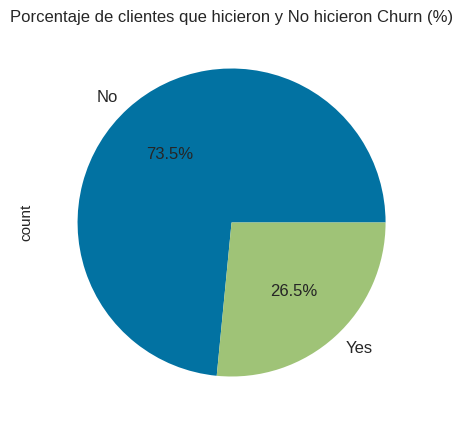

In [49]:
#grafica
ax = ((df_telecomx_normalizados['Churn (Si/No)'].value_counts()*100)/len(df_telecomx_normalizados))

ax.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12,title = 'Porcentaje de clientes que hicieron y No hicieron Churn (%)' )

#mostrar grafica
plt.show()

In [50]:
#grafica del churn por genero
px.histogram(df_telecomx_normalizados,
             x = 'Genero',
             text_auto = True,
             color = 'Churn (Si/No)',
             barmode = 'group',
             title='Comportamiento del Churn de acuerdo al genero del cliente',
            )

In [51]:
#grafica del churn de acuerdo a si tienes dependientes o no
px.histogram(df_telecomx_normalizados,
             x = 'Dependientes(Si/No)',
             text_auto = True,
             color = 'Churn (Si/No)',
             barmode = 'group',
             title='Comportamiento del Churn de acuerdo a si tienes dependientes o no ',
            )

In [52]:
#grafica del churn de acuerdo si es un cliente mayor a 65 años
px.histogram(df_telecomx_normalizados,
             x = 'Persona_mayor_65_años(Si/No)',
             text_auto = True,
             color = 'Churn (Si/No)',
             barmode = 'group',
             title='Comportamiento del Churn de acuerdo a si el cliente es tiene 65 años',
            )

La tasa de Churn **es mayor** entre los adultos mayores de 65 años, que entre los adultos menores de 65 años.

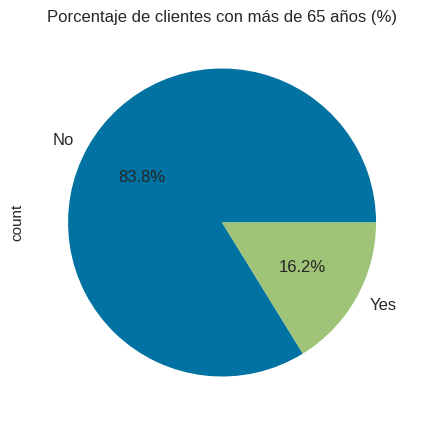

In [53]:
#grafica de la proporcion de clientes mayores a 65 años
ax = ((df_telecomx_normalizados['Persona_mayor_65_años(Si/No)'].value_counts()*100)/len(df_telecomx_normalizados))

# Get the Axes object from the plot
axes = ax.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12,title='Porcentaje de clientes con más de 65 años (%)' )

#mostrar grafica
plt.show()

In [54]:
#grafica del churn de acuerdo a si tiene factura en linea

px.histogram(df_telecomx_normalizados,
             x = 'Factura_en_linea(Si/No)',
             text_auto = True,
             color = 'Churn (Si/No)',
             barmode = 'group',
             title='Comportamiento del Churn de acuerdo a si el cliente tiene factura en línea o no',
            )

Al parecer los usuarios que tienen su factura en línea hacen más churn que los usuarios que  No tienen la factura en línea

In [55]:
#grafica del churn de acuerdo si tiene pareja
px.histogram(df_telecomx_normalizados,
             x = 'Pareja(Si/No)',
             text_auto = True,
             color = 'Churn (Si/No)',
             barmode = 'group',
             title='Comportamiento del Churn de acuerdo a si el cliente tiene pareja o no',
            )

In [56]:
#grafica del churn de acuerdo si tiene servicio telefónico
px.histogram(df_telecomx_normalizados,
             x = 'Suscr_Servicio_telefónico(Si/No)',
             text_auto = True,
             color = 'Churn (Si/No)',
             barmode = 'group',
             title='Comportamiento del Churn de acuerdo si tiene servicio telefónico o no',
             labels={'Suscr_Servicio_telefónico(Si/No)':'Suscripción al servicio telefónico'}
            )

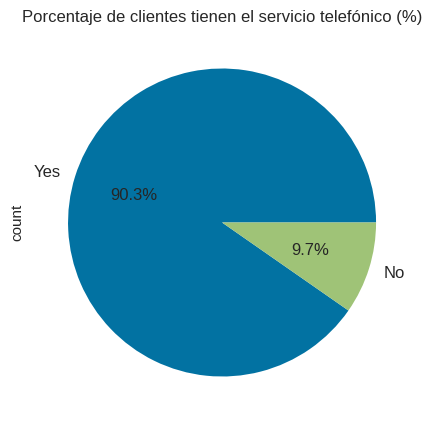

In [57]:
#grafica de la proporcion de clientes con servicio telefónico
ax = ((df_telecomx_normalizados['Suscr_Servicio_telefónico(Si/No)'].value_counts()*100)/len(df_telecomx_normalizados))

# Get the Axes object from the plot
axes = ax.plot.pie(autopct='%.1f%%', labels = ['Yes', 'No'],figsize =(5,5), fontsize = 12,title='Porcentaje de clientes tienen el servicio telefónico (%)' )

#mostrar grafica
plt.show()

In [58]:
df_telecomx_normalizados['Suscr_Servicio_telefónico(Si/No)'].value_counts()*100/len(df_telecomx_normalizados)

,count
Suscr_Servicio_telefónico(Si/No),
yes,90.316626
no,9.683374


In [59]:
#grafica del churn de acuerdo al método de pago
px.histogram(df_telecomx_normalizados,
             x = 'Metodo_de_pago',
             text_auto = True,
             color = 'Churn (Si/No)',
             barmode = 'group',
             title='Comportamiento del Churn de acuerdo al método de pago',
             labels={'Metodo_de_pago':'Método de pago'}
            )

In [60]:
#graficar la tipo de contrato y churn
px.histogram(df_telecomx_normalizados,
             x = 'Contrato',
             text_auto = True,
             color = 'Churn (Si/No)',
             barmode = 'group',
             title='Comportamiento del Churn de acuerdo al tipo de contrato',
            )

Se observar que hay una mayor cantidad de Churn cuando el contrato es mes a mes que un contrato por año. Fidelización de los clientes es mayor en los contratos de un año y dos años.

In [61]:
#graficar la Tiempo de contrato y churn
px.histogram(df_telecomx_normalizados,
             x = 'Antiguedad del cliente (meses)',
             text_auto = True,
             color = 'Churn (Si/No)',
             barmode = 'group',
             title='Comportamiento del Churn de acuerdo al tiempo al que ha durado el contrato',
            )

Hay una mayor tasa de Churn cuando los usuario tienen un contrato con un tiempo entre a 4-5 meses

In [62]:
#grafica
grupo_churn_tiempo_contrato = df_telecomx_normalizados.groupby(['Antiguedad del cliente (meses)','Churn (Si/No)']).size().unstack(fill_value=0) #.size():Cuenta el número de registros en cada combinación única de antiguedad cliente y Churn.
grupo_churn_tiempo_contrato
#.unstack(fill_value=0):sto transforma la Serie en un DataFrame donde: Las filas representan los valores únicos de customer.tenure
#Las columnas representan los valores únicos de Churn.  Los valores son los conteos
#fill_value=0 asegura que si alguna combinación no existe, se complete con 0 en lugar de NaN.


Churn (Si/No),no,yes
Antiguedad del cliente (meses),,
0,11,0
1,233,380
2,115,123
3,106,94
4,93,83
...,...,...
68,91,9
69,87,8
70,108,11


In [63]:
# Calcular el % de churn por tenure
grupo_churn_tiempo_contrato['tasa_churn'] = (grupo_churn_tiempo_contrato.get(1, 0) / grupo_churn_tiempo_contrato.sum(axis=1)) * 100
grupo_churn_tiempo_contrato['tasa_churn']

,tasa_churn
Antiguedad del cliente (meses),
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
68,0.0
69,0.0
70,0.0


In [64]:
#grafica de la tasa de Churn Vs el tiempo de contrato o antiguedad cliente
fig = px.line(grupo_churn_tiempo_contrato.reset_index(),
              x='Antiguedad del cliente (meses)',
              y='tasa_churn',
              markers=True,
              title='Tasa de Churn (%) por Antiguedad Cliente')
fig.show()

In [65]:
#grafica de dispersion de Churn Vs precio

px.scatter(df_telecomx_normalizados,
           x="Antiguedad del cliente (meses)",
           y="Mensual",
           color="Churn (Si/No)",
           title="Antiguedad del cliente vs Tarifa mensual por Churn",
           labels={"No._meses_de_contrato": "Antiguedad del cliente", "Mensual": "Tarifa mensual de los servicios"},
           )


In [66]:
#grafica de dispersion de Churn Vs precio

px.scatter(df_telecomx_normalizados,
           x="Antiguedad del cliente (meses)",
           y="Total",
           color="Churn (Si/No)",
           title="Antiguedad del cliente vs Pago Total por los servicios",
           labels={"No._meses_de_contrato": "Antiguedad del cliente", "Total": "Pago total por los servicios"},
           )

En el anterior gráfico, se observa que hay una relación entre la variable de Antiguedad del cliente y la variable del valor total del pago de los servicios, en donde a mayor antiguedad del cliente mayor valor en el pagode los servicios.

In [67]:
#grafica de dispersion de Churn Vs precio diario

px.scatter(df_telecomx_normalizados,
           x="Antiguedad del cliente (meses)",
           y="Cuentas_Diarias",
           color="Churn (Si/No)",
           title="Antiguedad del cliente vs Precio diario del servicio",
           labels={"No._meses_de_contrato": "Antiguedad del cliente", "Cuentas_Diarias": "Valor diario del servicio"},
           )

In [68]:
#Graficar un box plot tasa de Churn y costo mensual por los servicios
px.box(df_telecomx_normalizados,
       x = 'Churn (Si/No)',
       y = 'Mensual',
       color = 'Churn (Si/No)',
       labels={"Churn (Si/No)": "Churn", "Mensual": "Tarifa mensual de los servicios"},
       title = 'Boxplot del Churn de los clientes Vs el valor mensual de los servicios')

La mayor parte de los clientes que hicieron Churn pagan una mensualidad entre 56.15 dolares hasta 94.21 dolares. Los clientes pagan más mes a mes por sus servicios.

Los que hacen Churn pagan más por los servicios que los usuarios que no hicieron Churn

La mayor parte de los clientes que NO hicieron Churn pagan una mensualidad entre 25.1 hasta 88.40 dolares. Son clientes que pagan menos mes a mes por los servicios.


In [69]:
#Graficar un box plot tasa de Churn y costo mensual por los servicios
px.box(df_telecomx_normalizados,
       x = 'Churn (Si/No)',
       y = 'Total',
       color = 'Churn (Si/No)',
       labels={"Churn (Si/No)": "Churn", "Total": "Valor del pago Total por los servicios"},
       title = 'Boxplot del Churn de los clientes Vs el valor total de los servicios')

En los clientes que hicieron Churn, la mediana del valor a pagar por los servicios es igual a 703.55 dolares.

En los clientes que NO hicieron Churn, la mediana del valor a pagar por los servicios es igual a 1679.52 dolares.

Esta variable no responde porque los clientes hacen Churn.

In [70]:
#Graficar un box plot tasa de Churn y costo mensual por los servicios
px.box(df_telecomx_normalizados,
       x = 'Churn (Si/No)',
       y = 'Antiguedad del cliente (meses)',
       color = 'Churn (Si/No)',
       labels={"Churn (Si/No)": "Churn", "No._meses_de_contrato": "Antiguedad del Cliente"},
       title = 'Boxplot del Churn de los clientes Vs la antiguedad de los Clientes')


Con la anterior variable, se puede ver que la mayoria de lo usuarios que hacen Churn se encuentran entre el mes 2 y mes 29. Los primeros meses de los contratos de servicio.

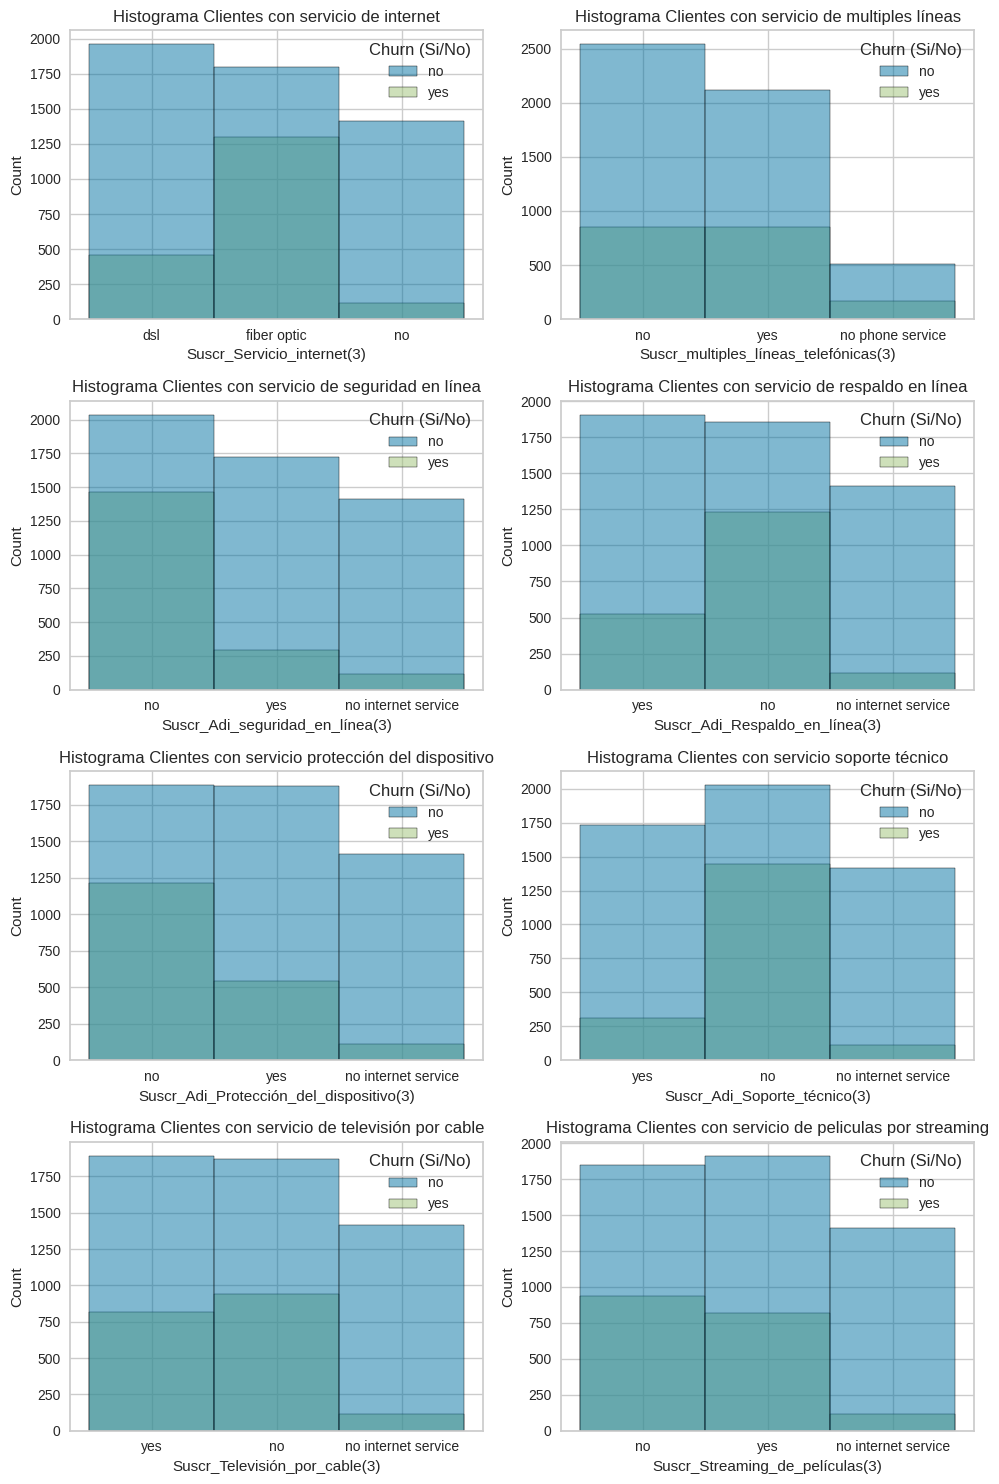

In [71]:
#crear grafica un boxplot y un histograma para la variable churn

#graficar en un solo lienzo
#crear lienzo No. de filas y no. de columnas
fig,ax = plt.subplots(4,2,figsize=(10,15))

#crear el histograma 1
sns.histplot(data=df_telecomx_normalizados,x='Suscr_Servicio_internet(3)',hue='Churn (Si/No)',ax=ax[0,0])
#caracteristicas del boxplot
ax[0,0].set_title('Histograma Clientes con servicio de internet')


#crear histograma 2
sns.histplot(data=df_telecomx_normalizados,x='Suscr_multiples_líneas_telefónicas(3)',hue='Churn (Si/No)',ax=ax[0,1])
#caracteristicas del boxplot
ax[0,1].set_title('Histograma Clientes con servicio de multiples líneas')


#crear histograma 3
sns.histplot(data=df_telecomx_normalizados,x='Suscr_Adi_seguridad_en_línea(3)',hue='Churn (Si/No)',ax=ax[1,0])
#caracteristicas del boxplot
ax[1,0].set_title('Histograma Clientes con servicio de seguridad en línea')


#crear histograma 4
sns.histplot(data=df_telecomx_normalizados,x='Suscr_Adi_Respaldo_en_línea(3)',hue='Churn (Si/No)',ax=ax[1,1])
#caracteristicas del boxplot
ax[1,1].set_title('Histograma Clientes con servicio de respaldo en línea')


#crear histograma 5
sns.histplot(data=df_telecomx_normalizados,x='Suscr_Adi_Protección_del_dispositivo(3)',hue='Churn (Si/No)',ax=ax[2,0])
#caracteristicas del boxplot
ax[2,0].set_title('Histograma Clientes con servicio protección del dispositivo')


#crear histograma 6
sns.histplot(data=df_telecomx_normalizados,x='Suscr_Adi_Soporte_técnico(3)',hue='Churn (Si/No)',ax=ax[2,1])
#caracteristicas del boxplot
ax[2,1].set_title('Histograma Clientes con servicio soporte técnico')
#ax[2,1].legend()

#crear histograma 7
sns.histplot(data=df_telecomx_normalizados,x='Suscr_Televisión_por_cable(3)',hue='Churn (Si/No)',ax=ax[3,0])
#caracteristicas del boxplot
ax[3,0].set_title('Histograma Clientes con servicio de televisión por cable')


#crear histograma 8
sns.histplot(data=df_telecomx_normalizados,x='Suscr_Streaming_de_películas(3)',hue='Churn (Si/No)',ax=ax[3,1])
#caracteristicas del boxplot
ax[3,1].set_title('Histograma Clientes con servicio de peliculas por streaming')

#
plt.tight_layout()

#mostrar graficos
plt.show()


Los usuarios **que tienen Servicio de Internet con fibra optica** hicieron más churn (en total 1300).

Los usuario que **NO tienen servicio de seguridad en linea** hicieron más churn.

Los usuarios que **NO tienen el servicio de respaldo en linea** hicieron más Churn.

Los usuarios que **NO tienen el servicio de protección del dispositivo** hicieron más Churn.

Los usuarios que **NO tienen el servicio de soporte Técnico** hicieron más Churn.

**En general, los usuarios que NO tienen un servicio adicional tienen más chance de hacer Churn.**

Como un paso adicional, puedes explorar la correlación entre diferentes variables del dataset. Esto puede ayudar a identificar qué factores tienen mayor relación con la evasión de clientes, como:

🔹 La relación entre la cuenta diaria y la evasión.

🔹 Cómo la cantidad de servicios contratados afecta la probabilidad de churn.

In [72]:
#eliminar la columna id

df_telecomx_normalizados_sin_id = df_telecomx_normalizados.drop('ID_cliente', axis=1)
df_telecomx_normalizados_sin_id

,Churn (Si/No),Genero,Persona_mayor_65_años(Si/No),Pareja(Si/No),Dependientes(Si/No),Antiguedad del cliente (meses),Suscr_Servicio_telefónico(Si/No),Suscr_multiples_líneas_telefónicas(3),Suscr_Servicio_internet(3),Suscr_Adi_seguridad_en_línea(3),...,Suscr_Adi_Protección_del_dispositivo(3),Suscr_Adi_Soporte_técnico(3),Suscr_Televisión_por_cable(3),Suscr_Streaming_de_películas(3),Contrato,Factura_en_linea(Si/No),Metodo_de_pago,Mensual,Total,Cuentas_Diarias
0,no,female,0,yes,yes,9,yes,no,dsl,no,...,no,yes,yes,no,one year,yes,mailed check,65.60,593.30,2.186667
1,no,male,0,no,no,9,yes,yes,dsl,no,...,no,no,no,yes,month-to-month,no,mailed check,59.90,542.40,1.996667
2,yes,male,0,no,no,4,yes,no,fiber optic,no,...,yes,no,no,no,month-to-month,yes,electronic check,73.90,280.85,2.463333
3,yes,male,1,yes,no,13,yes,no,fiber optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic check,98.00,1237.85,3.266667
4,yes,female,1,yes,no,3,yes,no,fiber optic,no,...,no,yes,yes,no,month-to-month,yes,mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,no,female,0,no,no,13,yes,no,dsl,yes,...,no,yes,no,no,one year,no,mailed check,55.15,742.90,1.838333
7263,yes,male,0,yes,no,22,yes,yes,fiber optic,no,...,no,no,no,yes,month-to-month,yes,electronic check,85.10,1873.70,2.836667
7264,no,male,0,no,no,2,yes,no,dsl,no,...,no,no,no,no,month-to-month,yes,mailed check,50.30,92.75,1.676667
7265,no,male,0,yes,yes,67,yes,no,dsl,yes,...,yes,yes,no,yes,two year,no,mailed check,67.85,4627.65,2.261667


In [73]:
#ver info del df
df_telecomx_normalizados_sin_id.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Churn (Si/No)                            7043 non-null   object 
 1   Genero                                   7043 non-null   object 
 2   Persona_mayor_65_años(Si/No)             7043 non-null   int64  
 3   Pareja(Si/No)                            7043 non-null   object 
 4   Dependientes(Si/No)                      7043 non-null   object 
 5   Antiguedad del cliente (meses)           7043 non-null   int64  
 6   Suscr_Servicio_telefónico(Si/No)         7043 non-null   object 
 7   Suscr_multiples_líneas_telefónicas(3)    7043 non-null   object 
 8   Suscr_Servicio_internet(3)               7043 non-null   object 
 9   Suscr_Adi_seguridad_en_línea(3)          7043 non-null   object 
 10  Suscr_Adi_Respaldo_en_línea(3)           7043 non-nul

In [74]:
#calcular la corelacción de las variables numéricas
df_telecomx_normalizados_sin_id[['Antiguedad del cliente (meses)','Mensual','Total','Cuentas_Diarias']].corr()

,Antiguedad del cliente (meses),Mensual,Total,Cuentas_Diarias
Antiguedad del cliente (meses),1.00000,0.247900,0.825880,0.247900
Mensual,0.24790,1.000000,0.651065,1.000000
Total,0.82588,0.651065,1.000000,0.651065
Cuentas_Diarias,0.24790,1.000000,0.651065,1.000000


Relación entre Churn y Cuenta Diaria es igual a 0.193356, el coeficiente de correlacion es muy bajo , no hay relación entre dichas variables.

Aparentemente, hay una correlación entre las variables Precio total de los servicios (Total) y la antiguedad del cliente (No. meses de contrato), costo mensual y cuentas diarias, Precio total de los servicios y costo mensual.


In [75]:
#exportar dataframe generado
df_telecomx_normalizados.to_csv('df_telecomx_normalizados.csv', index=False)

In [76]:
#leer dataframe generado
pd.read_csv('df_telecomx_normalizados.csv')

,ID_cliente,Churn (Si/No),Genero,Persona_mayor_65_años(Si/No),Pareja(Si/No),Dependientes(Si/No),Antiguedad del cliente (meses),Suscr_Servicio_telefónico(Si/No),Suscr_multiples_líneas_telefónicas(3),Suscr_Servicio_internet(3),...,Suscr_Adi_Protección_del_dispositivo(3),Suscr_Adi_Soporte_técnico(3),Suscr_Televisión_por_cable(3),Suscr_Streaming_de_películas(3),Contrato,Factura_en_linea(Si/No),Metodo_de_pago,Mensual,Total,Cuentas_Diarias
0,0002-ORFBO,no,female,0,yes,yes,9,yes,no,dsl,...,no,yes,yes,no,one year,yes,mailed check,65.60,593.30,2.186667
1,0003-MKNFE,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,yes,month-to-month,no,mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,yes,male,0,no,no,4,yes,no,fiber optic,...,yes,no,no,no,month-to-month,yes,electronic check,73.90,280.85,2.463333
3,0011-IGKFF,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,no,yes,yes,month-to-month,yes,electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,yes,yes,no,month-to-month,yes,mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,no,female,0,no,no,13,yes,no,dsl,...,no,yes,no,no,one year,no,mailed check,55.15,742.90,1.838333
7039,9992-RRAMN,yes,male,0,yes,no,22,yes,yes,fiber optic,...,no,no,no,yes,month-to-month,yes,electronic check,85.10,1873.70,2.836667
7040,9992-UJOEL,no,male,0,no,no,2,yes,no,dsl,...,no,no,no,no,month-to-month,yes,mailed check,50.30,92.75,1.676667
7041,9993-LHIEB,no,male,0,yes,yes,67,yes,no,dsl,...,yes,yes,no,yes,two year,no,mailed check,67.85,4627.65,2.261667


#📄Informe final

## 🔹 **Introducción**

El objetivo del análisis de los datos es identifIcar las posibles causas de porque se esta presentando un alto índice de evasión de clientes (Churn) en la empresa Telecom X.

La tasa Churn o la tasa de abandonos de clientes es la metrica que indica la proporción de clientes que dejan de interactuar con un producto o servicio en un lapso específico. En este caso la tasa de Churn mide la tasa de clientes que abandonan o que no continuan con los servicios de internet, televisión o telefónico de la empresa Telecom X.

## 🔹 **Limpieza y Tratamiento de Datos**

Describe los pasos realizados para importar, limpiar y procesar los datos

1.	Importar

Para comenzar a trabajar con los datos de tipo json fue necesario importarlos por medio de varios metodos de la libreria json de Python. Primero, se importó la librería json. Con ayuda de los métodos requests.get () y .loads() se importaron los datos, se cargaron y se guardaron en una variable para posteriormente crear una dataframe con dichos datos. Para crear el dataframe se utilizó la biblioteca Pandas.

2.	Limpiar

Para limpiar los datos primero se normalizo la base de datos, ya que diferentes variables estaban anidadas dentro de una misma columna. Dicha normalización se realizó con el método .json_normalize().

Posteriormente, se cambiaron los nombres de las columnas para tener una mejor comprensión de cada una de las variables del dataframe. Dicho proceso se realizó con el método .rename(). También, se evaluó los valores únicos de respuesta que estaban presentes en cada una las variables con los métodos .unique() y .nunique()

Seguidamente, se verificó si dentro del dataframe se encontraban valores con espacios vacíos (tipo object string vacíos con los metodos .apply(), astype(), .strip() y .sum()), si habian valores nulos tipo nan (con el método .isnull().sum()) y si habian valores duplicados (métodos .duplicated() y .sum()).

Finalmente, se eliminaron las filas tipo object con datos vacíos ya que correspondían a menos del 5% de todos los datos de dataframe.

3.	Procesar los datos

Durante el prcesamiento de los datos también se realizó la conversión del tipo de datos de las columnas que eran de tipo object a tipo float, ya que contenían en sus datos valores numéricos, por medio del método astype(). Por otro lado, para el caso de las variables tipo object-string o texto se eliminaron todos los caracteres excepto los siguientes caracteres: ^a-zA-Z0-9\-\', por medio del método .str y .replace(). Tambien, se busco que todo el texto tuviera el formato en minuscula con el metodo .str y .lower().

## 🔹 **Análisis Exploratorio de Datos**

Presenta los análisis realizados, incluyendo gráficos y visualizaciones para identificar patrones.

En el ánalisis exploratorio se evaluó la estadística descriptiva generada por el método .describe(), en donde se muestra la media, la mediana, los valores mínimos y máximos, y los cuartiles (25%,50% y 75%) de todas las variables numéricas, como se muestra acontinuación:

In [77]:
df_telecomx_normalizados.describe()

,Persona_mayor_65_años(Si/No),Antiguedad del cliente (meses),Mensual,Total,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,2.158723
std,0.368612,24.559481,30.090047,2266.771362,1.003002
min,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.500000,401.450000,1.183333
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.850000,3794.737500,2.995000
max,1.000000,72.000000,118.750000,8684.800000,3.958333


En la anterior tabla, muestran los sigueintes resultados:

En la antiguedad del cliente, el valor medio son 29 meses, y que el rango de la antoguedad del clliente se encuentra entre 0 y 72 meses.



Se realizaron diferentes gráficas evaluando como se comportaba la tasa de abandono de los clientes con respecto a variables como la edad, el genero, el tipo de contrato, si es dependiente o no, si tiene pareja o no, entre otras.

A continuación se muestran las gráficas que muestran las variables con una tasa de Churn alta:



### **Tasa Churn General**

Esta gráfica muestra la proporcion de churn para toda la base de datos:

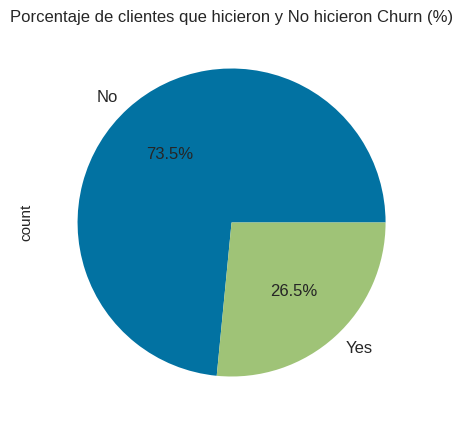

In [78]:
#grafica
ax = ((df_telecomx_normalizados['Churn (Si/No)'].value_counts()*100)/len(df_telecomx_normalizados))

ax.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12,title = 'Porcentaje de clientes que hicieron y No hicieron Churn (%)' )

#mostrar grafica
plt.show()

Se observa que tenemod una tasa de abandono de clientes igual al 26.5%.

### **Gráfica de Churn en la variable Depediente**

In [79]:
#grafica del churn de acuerdo a si tienes dependientes o no
px.histogram(df_telecomx_normalizados,
             x = 'Dependientes(Si/No)',
             text_auto = True,
             color = 'Churn (Si/No)',
             barmode = 'group',
             title='Comportamiento del Churn de acuerdo a si tienes dependientes o no ',
            )

Se observa que los clientes independientes tienden a abandonar la empresa.

### **Gráfica de Churn en la variable Personas mayores a 65 años**

In [80]:
#grafica del churn de acuerdo si es un cliente mayor a 65 años
px.histogram(df_telecomx_normalizados,
             x = 'Persona_mayor_65_años(Si/No)',
             text_auto = True,
             color = 'Churn (Si/No)',
             barmode = 'group',
             title='Comportamiento del Churn de acuerdo a si el cliente tiene 65 años',
            )

Los clientes con edad mayor a 65 años tienen un Churn mayor que los clientes menores a 65 años.

### **Gráfica de Churn en la variable Tienen factura en Línea**

In [81]:
#grafica del churn de acuerdo a si tiene factura en linea

px.histogram(df_telecomx_normalizados,
             x = 'Factura_en_linea(Si/No)',
             text_auto = True,
             color = 'Churn (Si/No)',
             barmode = 'group',
             title='Comportamiento del Churn de acuerdo a si el cliente tiene factura en línea o no',
            )

Los clientes que reciben la factura en línea tienden a tener una mayor tasa de Churn, probablemente NO este recibiendo su factura en línea a tiempo o NO la esten recibiendo.

### **Gráfica de Churn en la variable tiene servicio telefónico**

In [82]:
#grafica del churn de acuerdo si tiene servicio telefónico
px.histogram(df_telecomx_normalizados,
             x = 'Suscr_Servicio_telefónico(Si/No)',
             text_auto = True,
             color = 'Churn (Si/No)',
             barmode = 'group',
             title='Comportamiento del Churn de acuerdo si tiene servicio telefónico o no',
             labels={'Suscr_Servicio_telefónico(Si/No)':'Suscripción al servicio telefónico'}
            )

Se evidencia que los clientes con servicio telefónico tienen una mayor tasa Churn, probablemente el servicio telefónico no es muy bueno.

### **Gráfica de Churn en la variable método de pago**

In [83]:
#grafica del churn de acuerdo al método de pago
px.histogram(df_telecomx_normalizados,
             x = 'Metodo_de_pago',
             text_auto = True,
             color = 'Churn (Si/No)',
             barmode = 'group',
             title='Comportamiento del Churn de acuerdo al método de pago',
             labels={'Metodo_de_pago':'Método de pago'}
            )

Los clientes que usan el método de pago Electronic Check, están abandonando más la empresa. Al parecer este método de pago no esta prestando un buen servicio

### **Gráfica de Churn en la variable Tipo de contrato**

In [84]:
#graficar la tipo de contrato y churn
px.histogram(df_telecomx_normalizados,
             x = 'Contrato',
             text_auto = True,
             color = 'Churn (Si/No)',
             barmode = 'group',
             title='Comportamiento del Churn de acuerdo al tipo de contrato',
            )

Los clientes con tipo de contrato mes a mes tienden a abandonar la empresa más que los clientes con un contrato a uno o dos años. Es mejor vender los contratos de servicio por un año que por mes.  

### **Gráfica de Churn en la variable Antiguedad del Cliente**

In [85]:
#grafica de la tasa de Churn Vs el tiempo de contrato o antiguedad cliente
fig = px.line(grupo_churn_tiempo_contrato.reset_index(),
              x='Antiguedad del cliente (meses)',
              y='tasa_churn',
              markers=True,
              title='Tasa de Churn (%) por Antiguedad Cliente')
fig.show()

Los clientes nuevos o con poca antiguedad tienden a abandonar la empresa más que los cllientes que llevan más de dos años con la empresa.

### **Boxplot Tasa de Churn y costo mensual por los servicios**

In [86]:
#Graficar un box plot tasa de Churn y costo mensual por los servicios
px.box(df_telecomx_normalizados,
       x = 'Churn (Si/No)',
       y = 'Mensual',
       color = 'Churn (Si/No)',
       labels={"Churn (Si/No)": "Churn", "Mensual": "Tarifa mensual de los servicios"},
       title = 'Boxplot del Churn de los clientes Vs el valor mensual de los servicios')

Las personas que abandonan la empresa por lo general pagan por sus servicios mes a mes que las personas que no abandonan la empresa.

### **Gráfica de la variables Churn y servicio de internet**

In [87]:
#crear el histograma

px.histogram(df_telecomx_normalizados,
             x = 'Suscr_Servicio_internet(3)',
             text_auto = True,
             color = 'Churn (Si/No)',
             barmode = 'group',
             title='Comportamiento del Churn de acuerdo tipo de servicio de internet',
             labels={'Suscr_Servicio_internet(3)':'Tipo de servicio de internet'}
            )


Se observa que los clientes que más abandonan la empresa son los clientes que reciben el servicio de internet por fibra optica que los clientes que reciben su servicio de internet por dls. Al parecer el servicio de fibra optica no es muy bueno.

### **Gráfica de la variables Churn y servicio de soporte técnico**

In [88]:
#crear el histograma

px.histogram(df_telecomx_normalizados,
             x = 'Suscr_Adi_Soporte_técnico(3)',
             text_auto = True,
             color = 'Churn (Si/No)',
             barmode = 'group',
             title='Comportamiento del Churn de acuerdo al servicio de soporte técnico',
             labels={'Suscr_Adi_Soporte_técnico(3)':'Servicio de Soporte Técnico'}
            )

Los usuario o clientes que no tienen el servicio de soporte técnico tienden a abandondar más los servicios de la empresa Telecom X, que los demás clentes.

### **Gráfica de dispersión entre las variables Antiguedad del cliente y el pago total de los servicios**

In [89]:
#grafica de dispersion de Churn Vs precio

px.scatter(df_telecomx_normalizados,
           x="Antiguedad del cliente (meses)",
           y="Total",
           color="Churn (Si/No)",
           title="Antiguedad del cliente vs Pago Total por los servicios",
           labels={"Antiguedad del cliente (meses)": "Antiguedad del cliente", "Total": "Pago total por los servicios"},
           )

Se observa una relación proporcional entre las variables antiguedad del cliente y el pago total de los servicios. Ya que a medida que aumenta la antiguedad del cliente aumenta el valor de los costos para pagar los servicios.

Adiconalmente se observa que los clientes que hacen más churn se encuentran en los primeros meses del servicio y hasta los 40 meses de antiguedad aproximadamente.

## 🔹 **Conclusiones e Insights**

Resume los principales hallazgos y cómo estos datos pueden ayudar a reducir la evasión.

En conclusión, que la tasa de abandono o Churn de la empresa Telecom X es igual a 26.5 %, la cual es una tasa alta. De acuerdo a las gráficas obtenidas, se puede decir que las variables que pueden explicar la variable Tasa de Churn son: el servicio de internet por fibra optica, la antiguedad del cliente, tener o no el servicio de soporte técnico, la tarifa mensual de los servicios, el tipo de contrato, el método de pago, la edad de la persona, la factura en línea y si el cliente tiene un servicio adicional o no.

Por lo anterior, es necesario estudiar y analizar como cada una de las variables explicativas mencionadas previamente afectan el comportamiento de la tasa de Churn (variable respuesta), para esto es necesario ayudarnos de los datos que tenemos, las métricas estadísticas para entender la correlación que puede haber entre las variables explicativas y la relación que pueden tener las variables explicativas con la variable respuesta. Y la creación de modelos predictivos que se ajusten al comportamiento de los datos historicos reportados.



## 🔹 **Recomendaciones**

Ofrece sugerencias estratégicas basadas en tu análisis.

Teniendo en cuenta las variables análizadas anteriormente, considero importante tener en cuenta la variable Servicio de Soporte Técnico, ya que muchas veces un cliente al tener algún problema con el servicio es recurrente que busque ayuda para solucionar el problema técnico con la ayuda del soporte técnico, esot ayuda a soluionar el problema y que el cliente no se vaya porque un servicio no este funcionanando. Por lo tanto, entre más clientes cuenten con el servicio de soporte técnico, es más probable que el cliente no quierea abandonar la empresa.

Adicionalmente, el hecho de que un cliente tenga un excelente servicio a un precio justo hace que el cliente no abandone la empresa.